In [2]:
#importing libraries
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler

#feature selection
from sklearn.feature_selection import mutual_info_classif

#classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

# performance metrics
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
import pickle

#### Importing the data

In [3]:
#importing data
data=pd.read_csv("breast-cancer-wisconsin.data")

In [4]:
#arranging data
data.columns = ["id","ClumpThick","UniSize","UniShape","MargAd","SingleEpithelialSize","BareNuclei","BlandChromatin",
                "NormalNucleoli","Mitoses","Class"]

In [5]:
##generating a csv file from data with header
data.to_csv("data.csv", index=None, header=True)

In [6]:
#Data preprocessing
data = pd.read_csv("/home/mmk6053/Manoj_data/bioinfo_python/machine_learning/data.csv")

In [7]:
#print(data.head())
print(data.shape)

(698, 11)


### Preprocessing the data

In [8]:
#Checking the data in columns
print(data.columns[0:3])

Index(['id', 'ClumpThick', 'UniSize'], dtype='object')


In [9]:
#dropping the 'id' column
data.drop(['id'], inplace = True, axis = 1)
#print(data.head())

In [10]:
print(data.shape)

(698, 10)


In [11]:
#Replacing the missing values
data.replace('?', -99999, inplace = True)

In [12]:
#Changing the number 2 as 0 and 4 as 1 in Class column
#making function
def ret (x):
    if x == 4:
        return 1
    else:
        return 0
data["Class"] = data["Class"].map(ret)

#lambda function
#data["Class"] = data["Class"].map(lambda x: 1 if x ==4 else 0)

In [13]:
print(data.head())

   ClumpThick  UniSize  UniShape  MargAd  SingleEpithelialSize BareNuclei  \
0           5        4         4       5                     7         10   
1           3        1         1       1                     2          2   
2           6        8         8       1                     3          4   
3           4        1         1       3                     2          1   
4           8       10        10       8                     7         10   

   BlandChromatin  NormalNucleoli  Mitoses  Class  
0               3               2        1      0  
1               3               1        1      0  
2               3               7        1      0  
3               3               1        1      0  
4               9               7        1      1  


In [14]:
#Checking for missing values
datanul=data.isnull().sum()
g=[i for i in datanul if i > 0]
print('column with missing values:%d'%len(g))

column with missing values:0


In [15]:
#Let's check the number of samples and features
print(data.shape)

(698, 10)


In [16]:
print(data['Class'].value_counts())

0    457
1    241
Name: Class, dtype: int64


<AxesSubplot:>

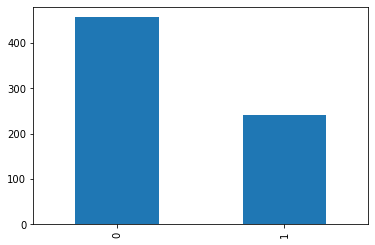

In [17]:
data['Class'].value_counts().plot.bar()

## Labels and Features

In [18]:
#Defining X and y (labels and features)

In [19]:
#Seperate the feature values from the class
X = np.array(data.drop(["Class"], axis = 1))
y= np.array(data["Class"])

In [20]:
print(X)

[[5 4 4 ... 3 2 1]
 [3 1 1 ... 3 1 1]
 [6 8 8 ... 3 7 1]
 ...
 [5 10 10 ... 8 10 2]
 [4 8 6 ... 10 6 1]
 [4 8 8 ... 10 4 1]]


In [21]:
print(y)

[0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1
 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1
 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0
 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1
 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0
 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0
 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1
 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 1 0 0 0 1 1 1 0 1 0 1 

#### Training and testing the model

In [22]:
[X_train,X_test,y_train,y_test] = train_test_split(X,y, test_size = 0.1,
                                              random_state = 0)

In [23]:
data.iloc[:,0:10].describe()

,ClumpThick,UniSize,UniShape,MargAd,SingleEpithelialSize,BlandChromatin,NormalNucleoli,Mitoses,Class
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,0.345272
std,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.475798
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [24]:
#SVC Classifier
Classifier = SVC(kernel = 'linear')
model  = Classifier.fit(X_train, y_train)
#Check accuracy
accu = model.score(X_test, y_test)
print ("Accuracy of SVC:", accu)

Accuracy of SVC: 0.9571428571428572


In [25]:
#Logistic Regression
Classifier = LogisticRegression(solver = 'liblinear')
model  = Classifier.fit(X_train, y_train)
#Check accuracy
accu = model.score(X_test, y_test)
print ("Accuracy of Logistic Regression:", accu)

Accuracy of Logistic Regression: 0.9714285714285714


In [26]:
#Saving and load the model
#Save the model
pickle.dump(model, open("LogisticRegression.m","wb"))
#load the model
loaded_model = pickle.load(open("LogisticRegression.m", "rb"))

In [27]:
accu = loaded_model.score(X_test, y_test)
print("Accuracy of Logistic Regression : ", accu)

Accuracy of Logistic Regression :  0.9714285714285714


## Prediction

In [ ]:
Home work!!!